1. age 열에서 이상치를 탐지하기 위한 기준을 설정하세요.

    #IQR(Interquartile Range) 방법을 사용하여 이상치를 탐지하고, 이상치의 개수를 출력하세요.
    #이상치를 적절한 방법(예: 제거 또는 대체)으로 처리하세요


In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
import numpy as np
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

df_kbi = pd.read_csv('../../datasets/성인 인구조사 소득 예측.csv')
df_kbi.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [98]:
df_kbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<Axes: xlabel='age'>

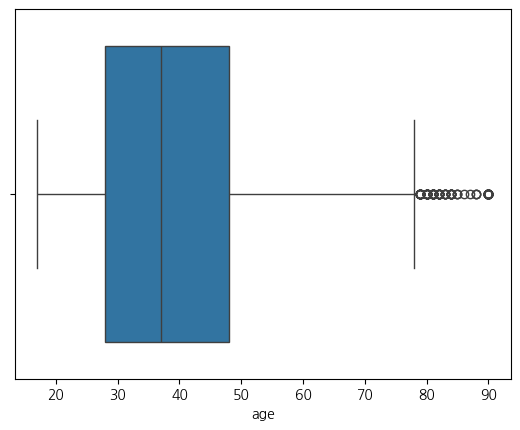

In [99]:
sns.boxplot(data = df_kbi, x = 'age')

In [100]:
df_kbi_describe = df_kbi.describe()
df_kbi_describe

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [101]:
Q1 = df_kbi_describe.loc['25%','age']
Q3 = df_kbi_describe.loc['75%','age']

IQR = Q3 - Q1
Q1, Q3, IQR

(28.0, 48.0, 20.0)

In [102]:
bound_max = Q3 + 1.5 * IQR
bound_min = Q1 - 1.5 * IQR
bound_max, bound_min

(78.0, -2.0)

In [103]:
condition = df_kbi['age'] <= bound_max
df_kbi_describe_withoutlier = df_kbi[condition]
df_kbi_describe_withoutlier.shape

(32418, 15)

<Axes: xlabel='age'>

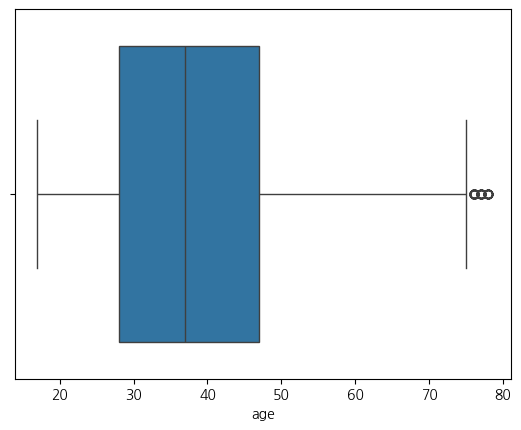

In [104]:
sns.boxplot(data = df_kbi_describe_withoutlier, x = 'age')

2. capital_gain과 capital_loss 열에서 이상치 여부를 탐지하세요.
    
    #. 각 열의 이상치 탐지를 위한 기준을 정의하고 이상치 비율을 출력하세요.
    
    #. 데이터의 분포를 시각화(박스플롯 또는 히스토그램)하여 결과를 확인하세요.


In [111]:
# sns.boxplot(data = df_kbi, x = 'capital_gain')
df_kbi.capital_gain.describe()
df_kbi.capital_loss.describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

2. 범주형 변수 처리
    
    1.workclass 열에서 값의 분포를 출력하고, 고유값(unique value)의 개수를 확인하세요.

        *빈도수가 매우 낮은 범주를 Other로 병합하세요.
    2.native_country 열에서 상위 5개의 빈도가 높은 국가를 추출하고, 나머지 국가를 Other로 그룹화하세요.

    3.education 열과 education_num 열의 관계를 탐구하세요.

        *두 열이 동일한 정보를 나타내는지 확인하고, 필요하다면 둘 중 하나를 제거하세요.

In [112]:
df_kbi.workclass.describe()

count       30725
unique          8
top       Private
freq        22696
Name: workclass, dtype: object

3. 데이터 변환 및 인코딩
    
    1.income 열을 이진(binary) 변수로 변환하세요.

        *<=50K를 0으로, >50K를 1로 변환합니다.